In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,backend_yn,python_yn,java_yn,database_yn,linux_yn,networking_yn,testing_yn,cyber_yn,aws_yn
0,"Software Engineer, Database Engine",$106K-$236K (Glassdoor Est.),Position Overview\n\n\nThe MemSQL database eng...,4.6,MemSQL\n4.6,"San Francisco, CA",-1,201 to 500 Employees,2011,Company - Private,...,9,0,0,0,1,1,1,1,0,0
1,Software Development Engineer - Distributed Da...,$106K-$236K (Glassdoor Est.),Join our team and experience Workday!\n\nIt's ...,4.0,Workday\n4.0,"Pleasanton, CA",-1,10000+ Employees,2005,Company - Public,...,15,0,0,1,1,1,0,0,0,0
2,Entry Level Software Developer,$106K-$236K (Glassdoor Est.),Discover the feelings of Camaraderie and Famil...,4.5,EAI Technologies\n4.5,"Washington, DC",-1,1 to 50 Employees,2001,Company - Private,...,19,0,0,1,0,0,0,0,0,1
3,Software Developer Intern - Remote Winter 2021,$106K-$236K (Glassdoor Est.),Together we’re building a company that will en...,4.6,PagerDuty\n4.6,Remote,-1,501 to 1000 Employees,2009,Company - Public,...,11,0,1,1,0,0,1,1,0,0
4,Data Engineer (Remote),$106K-$236K (Glassdoor Est.),IZEA was built to connect the worlds top brand...,4.1,"IZEA, Inc\n4.1","Orlando, FL",-1,51 to 200 Employees,2006,Company - Public,...,14,0,1,1,1,1,0,1,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'backend_yn', 'python_yn', 'java_yn', 'database_yn', 'linux_yn',
       'networking_yn', 'testing_yn', 'cyber_yn', 'aws_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data engineer' in title.lower():
        return 'data engineer'
    elif 'full stack' in title.lower():
        return 'full stack'
    elif 'cloud' in title.lower():
        return 'cloud engineer'
    elif 'web' in title.lower():
        return 'web developer'
    elif 'mobile' in title.lower():
        return 'mobile developer'
    elif 'back end' in title.lower() or 'back-end' in title.lower():
        return 'back-end developer'
    else:
        return 'software engineer'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    elif 'entry' in title.lower():
        return 'entry'
    else:
        return 'na'

In [6]:
df['job_simp']=df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

software engineer     181
full stack              7
data engineer           4
back-end developer      3
cloud engineer          2
mobile developer        2
web developer           1
Name: job_simp, dtype: int64

In [8]:
df['seniority']=df['Job Title'].apply(seniority)
df.seniority.value_counts()

na       196
entry      4
Name: seniority, dtype: int64

In [9]:
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='michigan' else 'MI')
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='new jersey' else 'NJ')
df.job_state.value_counts()

CA               30
NY               15
TX               14
VA               12
MD               11
WA               11
PA                9
MA                8
AZ                8
NJ                7
Remote            7
IL                7
AL                6
United States     6
CO                6
FL                5
GA                4
MI                3
DC                3
OR                3
NH                3
TN                2
UT                2
NC                2
KY                2
MO                2
MN                2
WI                2
NE                1
AK                1
PR                1
OH                1
RI                1
LA                1
SD                1
IA                1
Name: job_state, dtype: int64

In [10]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       3183
1       3313
2       1585
3       4796
4      10093
       ...  
195     1650
196     2728
197      682
198     2667
199     3122
Name: desc_len, Length: 200, dtype: int64

In [11]:
# Drop competitors column
df.drop('Competitors',inplace=True,axis=1)

In [12]:
df['company_txt']=df.company_txt.apply(lambda x:x.replace('\n',''))

In [13]:
df['company_txt']

0                                   MemSQL
1                                  Workday
2                         EAI Technologies
3                                PagerDuty
4                                IZEA, Inc
                      ...                 
195        Open Systems Technologies (NYC)
196    Universal Consulting Services, Inc.
197                                 Arohak
198                                Ricardo
199                   Infotree Service Inc
Name: company_txt, Length: 200, dtype: object

In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'company_txt', 'job_state', 'age',
       'backend_yn', 'python_yn', 'java_yn', 'database_yn', 'linux_yn',
       'networking_yn', 'testing_yn', 'cyber_yn', 'aws_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

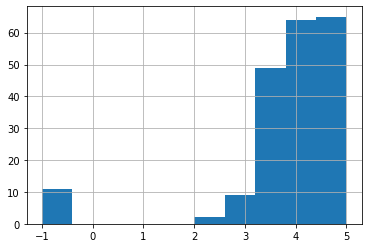

In [15]:
df.Rating.hist()

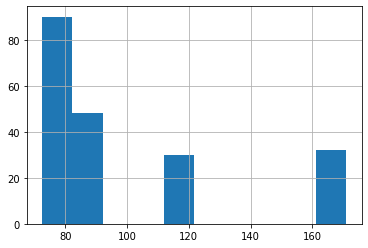

In [16]:
df.avg_salary.hist()

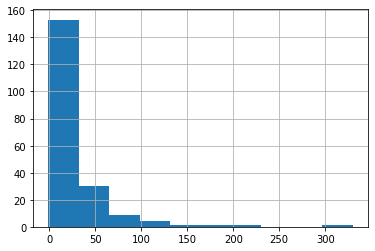

In [17]:
df.age.hist()

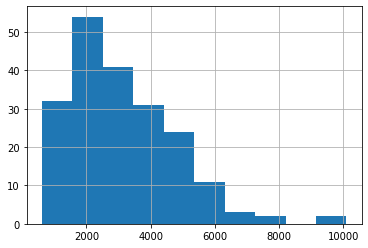

In [18]:
df.desc_len.hist()

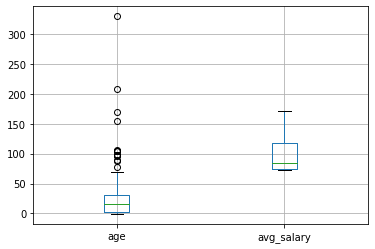

In [19]:
df.boxplot(column=['age','avg_salary'])

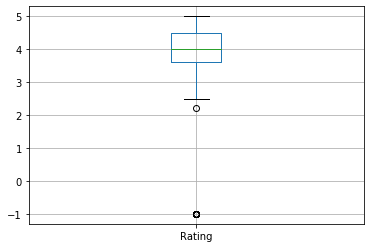

In [20]:
df.boxplot(column=['Rating'])

In [21]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.027003,0.037832,0.257510
avg_salary,-0.027003,1.000000,0.115689,0.122844
Rating,0.037832,0.115689,1.000000,0.021951
desc_len,0.257510,0.122844,0.021951,1.000000


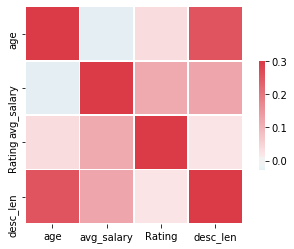

In [22]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [23]:
# Drop Headquarters column
df.drop('Headquarters',inplace=True,axis=1)

In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'backend_yn',
       'python_yn', 'java_yn', 'database_yn', 'linux_yn', 'networking_yn',
       'testing_yn', 'cyber_yn', 'aws_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [25]:
df_cat = df[['Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue','company_txt', 'job_state', 'age', 'backend_yn',
       'python_yn', 'java_yn', 'database_yn', 'linux_yn', 'networking_yn',
       'testing_yn', 'cyber_yn', 'aws_yn', 'job_simp', 'seniority']]

graph for Location: total = 125


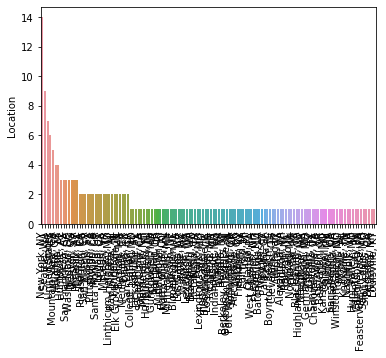

graph for Size: total = 9


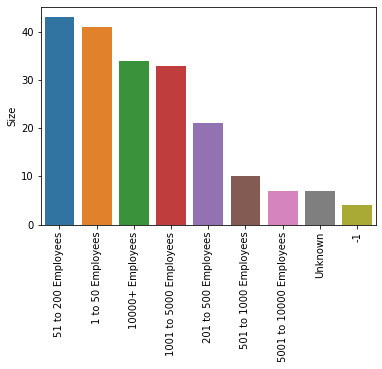

graph for Founded: total = 61


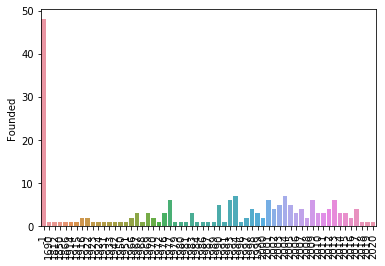

graph for Type of ownership: total = 9


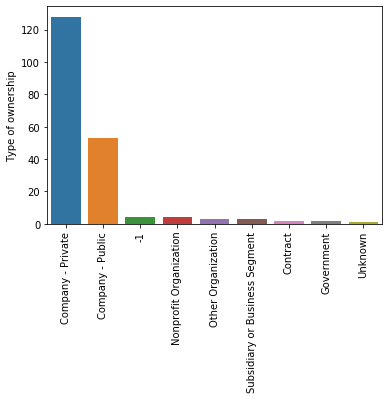

graph for Industry: total = 41


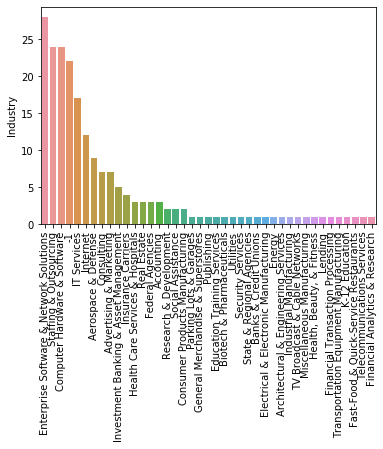

graph for Sector: total = 21


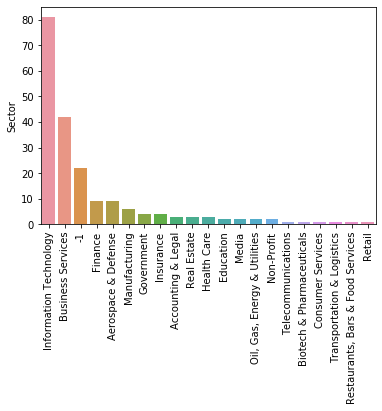

graph for Revenue: total = 14


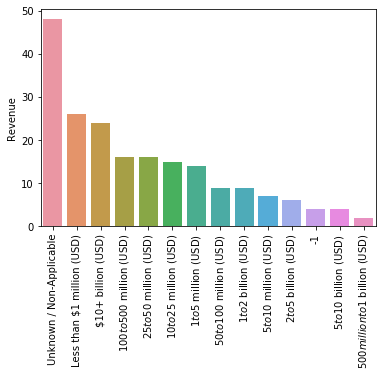

graph for company_txt: total = 168


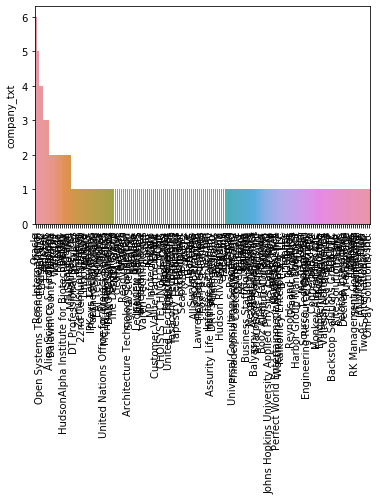

graph for job_state: total = 36


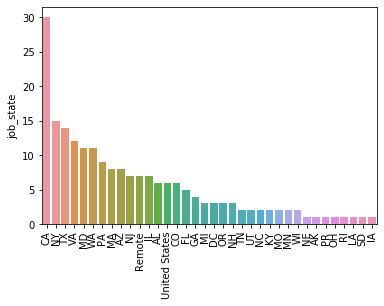

graph for age: total = 61


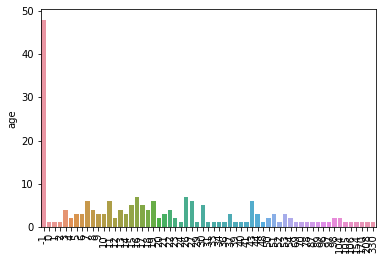

graph for backend_yn: total = 2


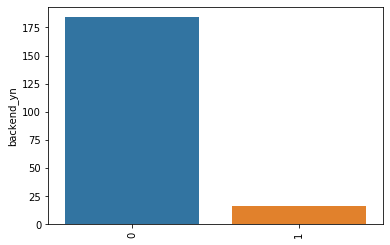

graph for python_yn: total = 2


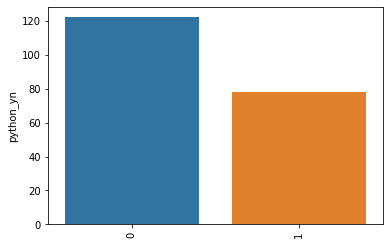

graph for java_yn: total = 2


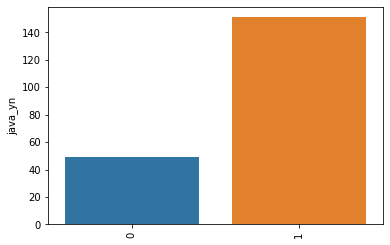

graph for database_yn: total = 2


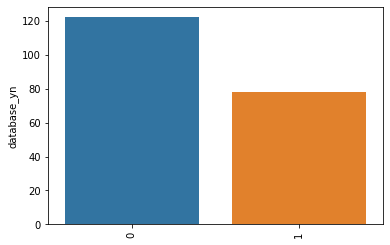

graph for linux_yn: total = 2


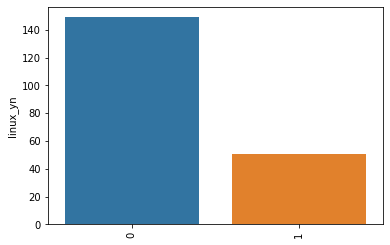

graph for networking_yn: total = 2


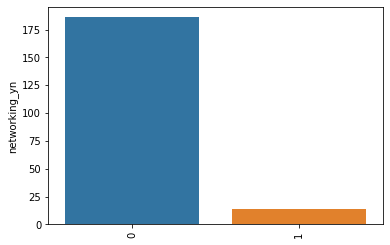

graph for testing_yn: total = 2


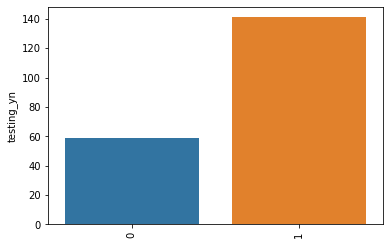

graph for cyber_yn: total = 2


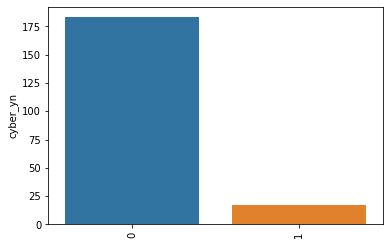

graph for aws_yn: total = 2


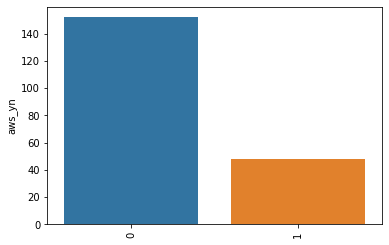

graph for job_simp: total = 7


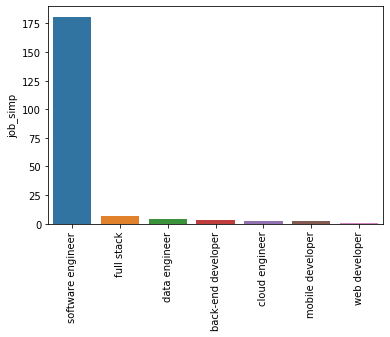

graph for seniority: total = 2


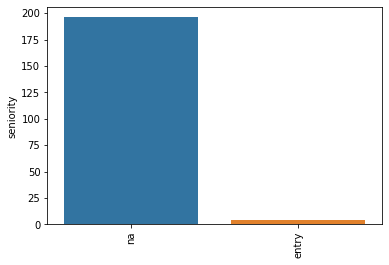

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d"%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for Location: total = 20


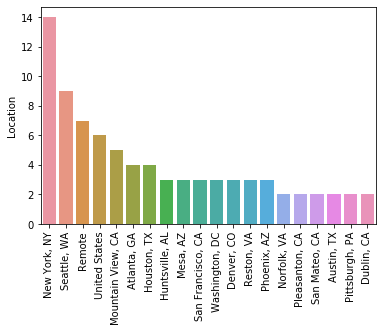

graph for company_txt: total = 20


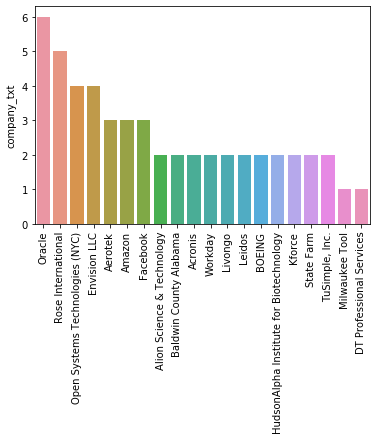

In [27]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d"%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [28]:
pd.pivot_table(df,index='job_simp',values='avg_salary')

,avg_salary
job_simp,
back-end developer,81.333333
cloud engineer,99.000000
data engineer,171.000000
full stack,126.714286
mobile developer,84.000000
software engineer,97.867403
web developer,118.000000


In [29]:
pd.pivot_table(df,index=['job_state','job_simp'],values='avg_salary').sort_values('avg_salary',ascending=False)

,,avg_salary
job_state,job_simp,
NY,data engineer,171.000000
FL,data engineer,171.000000
CA,data engineer,171.000000
WA,full stack,171.000000
CO,data engineer,171.000000
TX,full stack,127.500000
MD,full stack,125.500000
IL,software engineer,122.166667
MO,software engineer,121.750000


In [30]:
pd.options.display.max_rows

60

In [31]:
pd.set_option('display.max_rows',None)

In [32]:
pd.pivot_table(df,index=['job_state','job_simp'],values='avg_salary').sort_values('job_state',ascending=False)

avg_salary
job_state     job_simp                      
WI            software engineer    72.500000
WA            software engineer    93.500000
              mobile developer     84.000000
              full stack          171.000000
VA            software engineer    79.333333
United States software engineer    79.600000
              cloud engineer       80.000000
UT            software engineer    79.500000
TX            software engineer   108.727273
              full stack          127.500000
              cloud engineer      118.000000
TN            software engineer    96.500000
SD            software engineer    75.000000
Remote        software engineer   116.357143
RI            software engineer    80.000000
PR            software engineer    75.000000
PA            software engineer   103.944444
OR            software engineer   108.666667
OH            software engineer    75.000000
NY            software engineer   113.384615
              data engineer       171.000000
              back-end developer   84.000000
NJ            software engineer    80.500000
NH            software engineer   108.666667
NE            software engineer    75.000000
NC            software engineer   118.000000
MO            software engineer   121.750000
MN            software engineer    76.250000
MI            software engineer    79.833333
MD            software engineer    80.750000
              full stack          125.500000
              back-end developer   80.000000
MA            software engineer   106.083333
              mobile developer     84.000000
              back-end developer   80.000000
LA            software engineer    75.000000
KY            software engineer    77.500000
IL            software engineer   122.166667
              web developer       118.000000
IA            software engineer    92.000000
GA            software engineer   103.250000
FL            software engineer    81.000000
              data engineer       171.000000
DC            software engineer   105.333333
CO            software engineer    90.000000
              data engineer       171.000000
CA            software engineer   111.196429
              full stack          118.000000
              data engineer       171.000000
AZ            full stack           92.000000
              software engineer    90.928571
AL            software engineer    77.333333
AK            software engineer    84.000000

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'backend_yn',
       'python_yn', 'java_yn', 'database_yn', 'linux_yn', 'networking_yn',
       'testing_yn', 'cyber_yn', 'aws_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [34]:
df_pivots = df[['Rating','Type of ownership','Industry', 'Sector', 'Revenue','backend_yn','python_yn', 'java_yn', 'database_yn', 'linux_yn', 'networking_yn','testing_yn', 'cyber_yn', 'aws_yn', 'job_simp','avg_salary']]

In [35]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.9    121.750000
 4.5    121.428571
 4.7    116.687500
 4.6    114.700000
 3.9    113.454545
 4.1    111.636364
 4.2    106.350000
 3.1    106.166667
 3.2    104.600000
 3.7    104.222222
 3.4     99.166667
 3.8     98.200000
 4.0     93.566667
 4.4     93.357143
 5.0     92.781250
 3.3     92.250000
 3.5     90.625000
 3.6     87.142857
-1.0     86.136364
 3.0     85.125000
 4.3     83.857143
 4.9     80.125000
 2.5     80.000000
 4.8     77.250000
 2.2     72.500000
Type of ownership
                                avg_salary
Type of ownership                         
Company - Public                102.896226
Company - Private               101.445312
Government                       96.500000
Subsidiary or Business Segment   91.000000
-1                               81.000000
Unknown                          80.000000
Other Organization               79.666667
Contract                         78.250000
Nonprofit Organization          

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [36]:
pd.pivot_table(df_pivots,index='Revenue',columns='java_yn',values='avg_salary',aggfunc='count')

java_yn,0,1
Revenue,,
$1 to $2 billion (USD),1.0,8.0
$1 to $5 million (USD),2.0,12.0
$10 to $25 million (USD),3.0,12.0
$10+ billion (USD),6.0,18.0
$100 to $500 million (USD),5.0,11.0
$2 to $5 billion (USD),2.0,4.0
$25 to $50 million (USD),1.0,15.0
$5 to $10 billion (USD),1.0,3.0
$5 to $10 million (USD),1.0,6.0


In [37]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

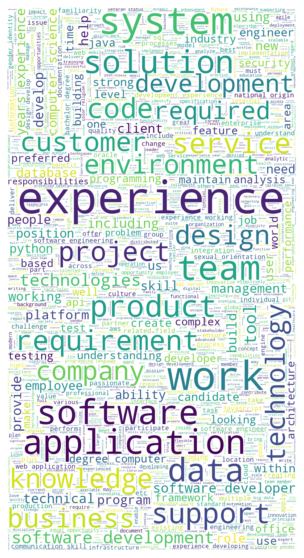

In [38]:
words =" ".join(df['Job Description'])

def punctuation_stop(text):
    filtered=[]
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered ])
wc = WordCloud(background_color="white",random_state=1, stopwords = STOPWORDS, max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()


In [39]:
df.to_csv("eda_data.csv")